Academic Integrity and Learning Statement

By submitting my work, I confirm that:

1. The code, analysis, and documentation in this notebook are my own work and reflect my own understanding.
2. I am prepared to explain all code and analysis included in this submission.

If I used assistance (e.g., AI tools, tutors, or other resources), I have:

- Clearly documented where and how external tools or resources were used in my solution.
- Included a copy of the interaction (e.g., AI conversation or tutoring notes) in an appendix.

I acknowledge that:

- I may be asked to explain any part of my code or analysis during evaluation.
- Misrepresenting assisted work as my own constitutes academic dishonesty and undermines my learning.

## A. An overview of the dataset
The objective of this task is to gain some general information about the dataset before starting your exploration journey. By the end of this task, you will know about the number of observations, the index and columns, the data types, and the missing observations in the dataset. These are necessary information to know about any dataset before jumping into data exploration.

1. Import the data as a Pandas DataFrame and name it as df.
2. Check the number of rows and columns.
3. Display the first few entries of the DataFrame.
4. Obtain the index labels, and then show the column names as a list.
5. Check the data type for each column.
6. Check if there are any missing values and show the rows that contain the missing values.
7. If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type.


In [329]:
#1
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("p1_communes.csv")

In [107]:
#2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Canton                      2199 non-null   object 
 1   Commune                     2202 non-null   object 
 2   Language                    2191 non-null   object 
 3   Residents                   2202 non-null   int64  
 4   Population density per km²  2202 non-null   float64
 5   0-19 years                  2202 non-null   float64
 6   20-64 years                 2202 non-null   float64
 7   65 years or over            2202 non-null   float64
 8   Private households          2202 non-null   int64  
 9   Surface area in km²         2202 non-null   float64
 10  Settlement area             2202 non-null   float64
 11  Agricultural area           2202 non-null   float64
 12  Wooded area                 2202 non-null   float64
 13  Unproductive area           2202 

In [108]:
#3
df.head(5)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543


In [331]:
#4
df.index.array

<NumpyExtensionArray>
[   np.int64(0),    np.int64(1),    np.int64(2),    np.int64(3),
    np.int64(4),    np.int64(5),    np.int64(6),    np.int64(7),
    np.int64(8),    np.int64(9),
 ...
 np.int64(2192), np.int64(2193), np.int64(2194), np.int64(2195),
 np.int64(2196), np.int64(2197), np.int64(2198), np.int64(2199),
 np.int64(2200), np.int64(2201)]
Length: 2202, dtype: int64

In [110]:
df.columns

Index(['Canton', 'Commune', 'Language', 'Residents',
       'Population density per km²', '0-19 years', '20-64 years',
       '65 years or over', 'Private households', 'Surface area in km²',
       'Settlement area', 'Agricultural area', 'Wooded area',
       'Unproductive area', 'East coordinate', 'North coordinate',
       'Elevation'],
      dtype='object')

In [111]:
#5
df.dtypes

Canton                         object
Commune                        object
Language                       object
Residents                       int64
Population density per km²    float64
0-19 years                    float64
20-64 years                   float64
65 years or over              float64
Private households              int64
Surface area in km²           float64
Settlement area               float64
Agricultural area             float64
Wooded area                   float64
Unproductive area             float64
East coordinate                 int64
North coordinate                int64
Elevation                       int64
dtype: object

In [112]:
#6
df.isnull().sum()

Canton                         3
Commune                        0
Language                      11
Residents                      0
Population density per km²     0
0-19 years                     0
20-64 years                    0
65 years or over               0
Private households             0
Surface area in km²            0
Settlement area                0
Agricultural area              0
Wooded area                    0
Unproductive area              0
East coordinate                0
North coordinate               0
Elevation                      0
dtype: int64

In [ ]:
#showing the rows that contain missing values:
canton_null_values = df[df['Canton'].isnull()]
language_null_values = df[df['Language'].isnull()]
null_values_df = pd.concat([canton_null_values,language_null_values]).drop_duplicates() #just dropping duplicates as a good practice
null_values_df


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
440,NaN,Thurnen,NaN,1922,323.025210,20.759625,58.324662,20.915713,814,5.95,13.949580,79.159664,6.050420,0.840336,2605300,1184700,558
704,NaN,Villaz,NaN,2287,148.217758,24.398776,61.346742,14.254482,897,15.44,8.808290,70.336788,20.401554,0.453368,2563200,1174400,727
757,NaN,Prez,NaN,2236,139.401496,25.000000,61.672630,13.327370,839,16.04,6.924517,68.808484,23.268871,0.998129,2567700,1181700,651
155,ZH,Stammheim,NaN,2747,114.649416,21.405169,58.281762,20.313069,1125,23.96,9.056761,55.801336,34.557596,0.584307,2702400,1276500,455
156,ZH,Wädenswil,NaN,24341,682.968575,19.740356,59.944127,20.315517,10371,35.64,19.336706,63.265880,15.064643,2.332771,2693400,1231600,641
157,ZH,Elgg,NaN,4903,201.025010,20.762798,60.473180,18.764022,2121,24.39,9.545268,46.907005,43.138058,0.409668,2707700,1260900,598
158,ZH,Horgen,NaN,22665,735.160558,20.657401,60.480918,18.861681,9685,30.83,18.456049,38.858255,39.506974,3.178722,2687800,1234900,624
1133,GR,Bergün Filisur,NaN,905,4.759651,16.574586,59.668508,23.756906,397,190.14,0.977815,19.824414,27.541794,51.655977,2776700,1166700,2273
1165,GR,Rheinwald,NaN,577,4.217220,16.984402,54.072790,28.942808,266,136.82,1.124334,34.328685,14.448419,50.098562,2744500,1157500,2192
1626,TI,Riviera,NaN,4220,48.780488,20.071090,61.445498,18.483412,1774,86.58,4.008317,7.034770,65.553887,23.403026,2718700,1128900,1458


In [114]:
#7
clean_df = df.dropna() # as requested, I remove the missing values instead renaming or replacing them.
clean_df.isna().sum() # no missing values, and no mixed dtypes in columns


Canton                        0
Commune                       0
Language                      0
Residents                     0
Population density per km²    0
0-19 years                    0
20-64 years                   0
65 years or over              0
Private households            0
Surface area in km²           0
Settlement area               0
Agricultural area             0
Wooded area                   0
Unproductive area             0
East coordinate               0
North coordinate              0
Elevation                     0
dtype: int64

## B. Exploration: numerical summaries, indexing and grouping
Now that you are familiar with the general structure of the dataset, you can start an exploration adventure! Data exploration or explanatory data analysis enables you to tell a story with the data. It can be done in several ways depending on the objective and data types. In this task, you use your data summarization and aggregation skills to explore the data.

1. Obtain the mean, minimum and maximum value for each column containing numerical data. Your output should preferably show only the three requested statistics and not the full table of descriptive statistics.
2. List the 10 most populated communes, ordered by their number of residents.
3. List the 10 least populated communes, ordered by their number of residents.
4. Group the communes by canton and save them into separate .csv files, e.g. a ZH.csv with all the data for communes in Zurich (Do not include the .csv files in your submission).
5. Compute the population density at the canton level and rank the cantons from most dense to least dense. Clearly state and comment your observations.
6. Compute the number of communes in each canton where more than 50 percent of their populations are aged between 20 and 64 years old.
7. Compute the difference between the maximum and minimum elevations for each canton. Find the top 5 cantons that have the largest range of elevations?

In [ ]:
#1
#selecting the numerical columns:
numerical_columns = clean_df.iloc[:,3:] 

#selecting main statistics:
maximum = numerical_columns.max().round(2)
minimum = numerical_columns.min().round(2)
mean = numerical_columns.mean().round(2)

#creating the df with the information
stats = pd.DataFrame({'Maximum' : maximum,
                      'Minimum' : minimum,
                      'Mean' : mean})
stats

,Maximum,Minimum,Mean
Residents,415367.00,11.00,3865.30
Population density per km²,12669.05,0.90,433.42
0-19 years,37.78,0.00,20.59
20-64 years,77.92,18.18,60.37
65 years or over,81.82,6.27,19.04
Private households,201252.00,10.00,1702.49
Surface area in km²,438.63,0.31,17.97
Settlement area,97.26,0.14,14.88
Agricultural area,91.51,0.00,45.93
Wooded area,88.24,0.00,32.58


In [ ]:
#2 Displaying the most populated communes ordered by residents number:
#subsetting the commune and resident columns in a new df
ordered_communes = clean_df.iloc[:,[1,3]]
#setting the communes as the index and displaying it from most to less populated
ordered_communes.set_index('Commune').sort_values('Residents',ascending=False).head(10)

,Residents
Commune,
Zürich,415367
Genève,201818
Basel,172258
Lausanne,139111
Bern,133883
Winterthur,111851
Luzern,81691
St. Gallen,75833
Lugano,63185


In [332]:
#3:
#displaying the communes from less to more populated:
ordered_communes.set_index('Commune').sort_values('Residents', ascending=True).head(10)

,Residents
Commune,
Corippo,11
Kammersrohr,28
Bister,33
Schelten,36
Rebévelier,41
Berken,45
Cerentino,45
Clavaleyres,46
Lohn (GR),46


In [ ]:
#4 Group the communes by canton and save them into separate .csv files, e.g. a ZH.csv with all the data for communes in Zurich (Do not include the .csv files in your submission).
#subsetting the cantons names in a series: 
cantons_names = clean_df['Canton'].drop_duplicates() #as good practice, I again drop duplicates()
for canton in cantons_names: #starting the loop
        clean_df[clean_df['Canton'] == canton].to_csv(f"{canton}.csv") # applying the same manipulation for every canton and saving it


In [ ]:
#5 Compute the population density at the canton level and rank the cantons from most dense to least dense. Clearly state and comment your observations.
#instead selecting the population density per km2, I directly subset just the canton, the residents and the surface area:
density_df = clean_df.loc[:,['Canton','Residents','Surface area in km²']]

In [333]:
#I create two empty arrays, one for the canton list and another one for the density list. I will create after with the filled array the new df
canton_list = []
density_list = []

#filling the arrays with the required information. In this case I manually calculate the population density for each canton
for canton in cantons_names:
    canton_list.append(canton)
    density_list.append((clean_df[clean_df['Canton'] == canton]['Residents'].sum()) / (clean_df[clean_df['Canton'] == canton]['Surface area in km²'].sum())) 


#Creating the new df
density_per_canton = pd.DataFrame({'Canton' : canton_list,
                                   'Population density per km²' : density_list
})

#Displaying the new df, having cantons as index and sorting the population density from higher to lower:

density_per_canton.set_index('Canton').sort_values('Population density per km²',ascending=False)


,Population density per km²
Canton,
BS,5271.069012
GE,2031.893255
ZH,948.443099
ZG,612.265881
BL,556.593969
AG,486.145498
SO,345.618319
TG,320.320701
LU,286.577848


As we can see, there is a huge difference between the most and the least populated cantons. 

BS and GE are outliers, as they have between 2 and  5 times more population density density than the third canton of the list. However, they are both very important cities in Switzerland, and both are border cities (Germany and France for BS and France for GE), which maybe could be a reason that explains this phenomena. The canton that hosts the most populated city (Zurich), is third place, but still far from this two.

In the tail of the list, we have three cantons that have less than 2 people per km²: UR, GL, GR. UR have even less than 35 people and GL has less than 30. All three cantons are geographically in the mountains.

In [334]:
#6 Compute the number of communes in each canton where more than 50 percent of their populations are aged between 20 and 64 years old.

#selecting the required communes and then grouping by canton and displaying the amount of communes for each canton:
young_communes_by_canton = clean_df[clean_df['20-64 years'] > 50].groupby('Canton').size()
young_communes_by_canton

Canton
AG    210
AI      6
AR     20
BE    339
BL     86
BS      3
FR    131
GE     45
GL      3
GR    100
JU     53
LU     82
NE     30
NW     11
OW      7
SG     77
SH     26
SO    109
SZ     29
TG     80
TI    113
UR     20
VD    309
VS    124
ZG     11
ZH    158
dtype: int64

In [335]:
# 7 Compute the difference between the maximum and minimum elevations for each canton. Find the top 5 cantons that have the largest range of elevations?
canton_elevation_index = [] #declaring the empty arrays to append the data
max_elevation = []
min_elevation = []
elevation_range = []
grouped_max = clean_df.groupby('Canton')['Elevation'].max() #subsetting the maximum and minimum elevation from the dataset
grouped_min = clean_df.groupby('Canton')['Elevation'].min()

#now appending the data into the empty arrays
for canton in cantons_names:
    canton_elevation_index.append(canton) 
    max_elevation.append(grouped_max.loc[canton])
    min_elevation.append(grouped_min.loc[canton])
    elevation_range.append(grouped_max.loc[canton] - grouped_min.loc[canton]) #manually operating to obtain the difference between the max and min elevation


#creating the new df
elevation_range_df = pd.DataFrame({
    'Canton' : canton_elevation_index,
    'Max. Elevation' : max_elevation,
    'Min Elevation' : min_elevation,
    'Elevation Range' : elevation_range
})

#displaying the new df sorting by elevation range from higher to lower
elevation_range_df.sort_values('Elevation Range', ascending=False).head(5)


,Canton,Max. Elevation,Min Elevation,Elevation Range
22,VS,3080,470,2610
20,TI,2244,200,2044
1,BE,2446,421,2025
17,GR,2606,589,2017
3,UR,2413,542,1871



## C. Exploration: visualizations


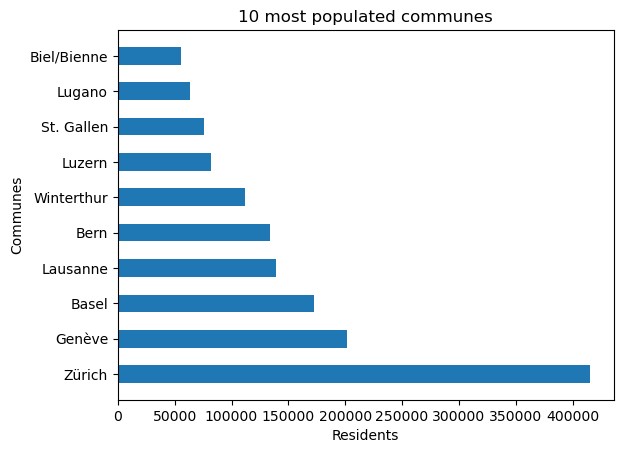

In [124]:
#1 Getting the data we need for plotting
horizontal_plot_data = clean_df.sort_values('Residents', ascending=False).iloc[:,[0,1,3,10,11,12,13]].head(10)
hplot_communes = horizontal_plot_data['Commune']

#plotting
x = horizontal_plot_data['Residents']
y = hplot_communes

plt.title('10 most populated communes')
plt.xlabel('Residents')
plt.ylabel('Communes')
plt.barh(y,x,height=0.5);


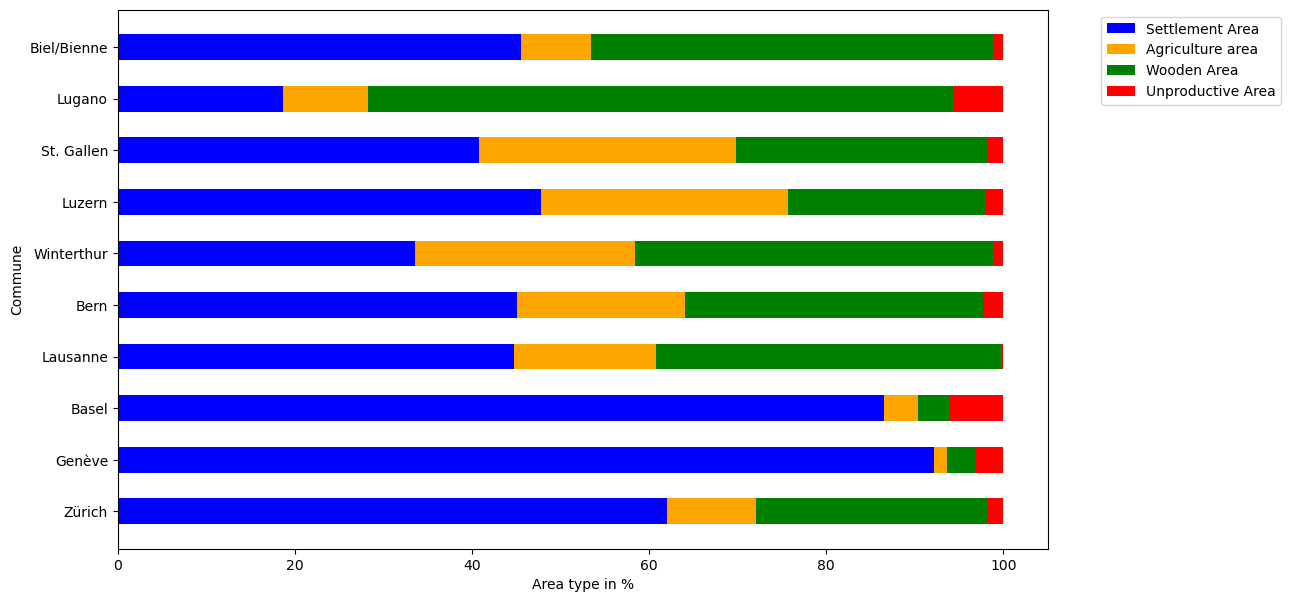

In [ ]:
#2
#Getting the data we need for plotting
horizontal_plot_data = clean_df.sort_values('Residents', ascending=False).iloc[:,[0,1,3,10,11,12,13]].head(10)
hplot_communes = horizontal_plot_data['Commune']
hplot_total_area = horizontal_plot_data.iloc[:,[3,4,5,6]]
hplot_settlement = horizontal_plot_data.iloc[:,3]
hplot_agri = horizontal_plot_data.iloc[:,4]
hplot_wood = horizontal_plot_data.iloc[:,5]
hplot_unproductive = horizontal_plot_data.iloc[:,6]
xcor = 100 #as the total area will be 100%, we set the xcor at 100

#plotting
#setting the figure and labeling x and y 
plt.figure(figsize=(12,7)) 
plt.xlabel('Area type in %')
plt.ylabel('Commune')

#filling the plot with the data in order to imitate the given chart 
plt.barh(hplot_communes,xcor, height=0.5)
plt.barh(hplot_communes,hplot_settlement, label='Settlement Area', color= 'blue',height=0.5)
plt.barh(hplot_communes,hplot_agri, label='Agriculture area', left=hplot_settlement, color='orange',height=0.5)
plt.barh(hplot_communes,hplot_wood, label='Wooden Area', left= hplot_settlement + hplot_agri, color='green',height=0.5)
plt.barh(hplot_communes,hplot_unproductive, label='Unproductive Area', left=hplot_settlement + hplot_agri + hplot_wood, color= 'red',height=0.5)

#then setting the legend and showing 
plt.legend(bbox_to_anchor=(1.05,1)) #https://www.geeksforgeeks.org/how-to-place-legend-outside-of-the-plot-in-matplotlib/
plt.show();

Basel and Geneve are the two cities with more percentage of settlement area (between 80% and 100%), followed by Zurich (around 60%). We can see that the cities with more settlement area are at the same time the cities with less percentage of agriculture area. On the other hand, Lugano is the city with more wooden area (however, the presence of agriculture area is low). The cities with more agriculture area are St. Gallen, Luzern and Winterthur, which have more or less hte same proportion of production areas (in the case of Winterthur we have more percentage wooden area than settlement area).
Notice that all cities have a very small percentage of unproductive area, being Lausanne the one with the smallest percentage and Lugano and Basel the ones with the biggest percentage.

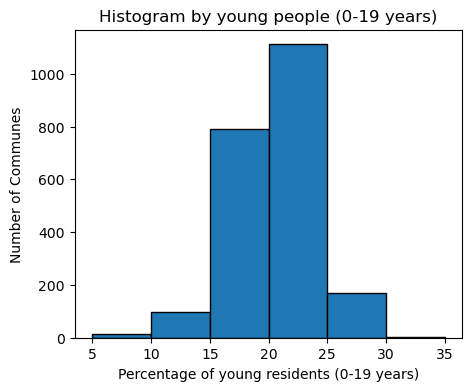

In [338]:
#3
#setting the figure
plt.figure(figsize=(5,4))

#setting the bins in the percentages array, then plotting 
percentages = [5, 10, 15, 20, 25, 30, 35]
plt.hist(clean_df['0-19 years'], bins=percentages, edgecolor='black')


#setting title and labels
plt.xlabel('Percentage of young residents (0-19 years)')
plt.ylabel('Number of Communes')
plt.title('Histogram by young people (0-19 years)')
plt.show();







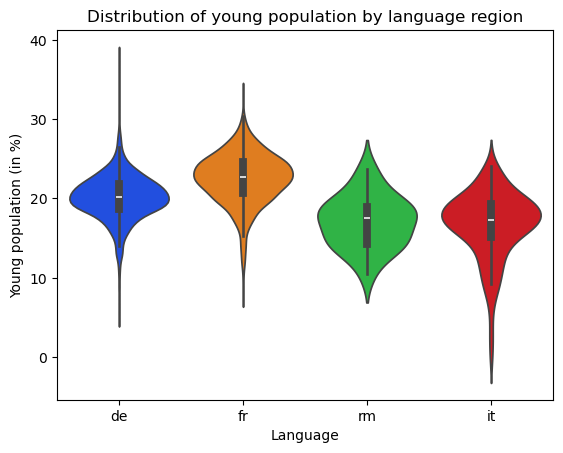

In [339]:
#4
#I chose the violin plot
sns.violinplot(x = clean_df['Language'], y = clean_df['0-19 years'], hue=clean_df['Language'], palette='bright')
plt.title('Distribution of young population by language region')
plt.ylabel('Young population (in %)');


This violin plot shows the distribution of the proportion of young people (aged 0 to 19) across the four main language regions in Switzerland. The French and German-speaking regions have relatively similar distributions. However, the median is slightly higher in the French region (just above 20%) compared to the German region (around 20%), suggesting a slightly younger population in French-speaking communes.

In contrast, the Romansh- and Italian-speaking regions exhibit lower medians (around 18%), and both include a noticeable number of communes with less than 10% youth population. This indicates more variation and potentially more aging populations in those areas.

Outliers are present in both the German and Italian regions. The German-speaking region includes communes with very high youth proportions (approaching 40%), while the Italian-speaking region has cases with extremely low youth presence (down to 0%), pointing to isolated demographic extremes.

C:\Users\aleja\AppData\Local\Temp\ipykernel_13628\3725495841.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax=axes[0], data=clean_df, x='Language', y='0-19 years', palette='pastel')
C:\Users\aleja\AppData\Local\Temp\ipykernel_13628\3725495841.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax=axes[1], data=clean_df, x='Language', y='20-64 years', palette='pastel')
C:\Users\aleja\AppData\Local\Temp\ipykernel_13628\3725495841.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax=axes[2], data=clean_df, x='Language', y='65 y

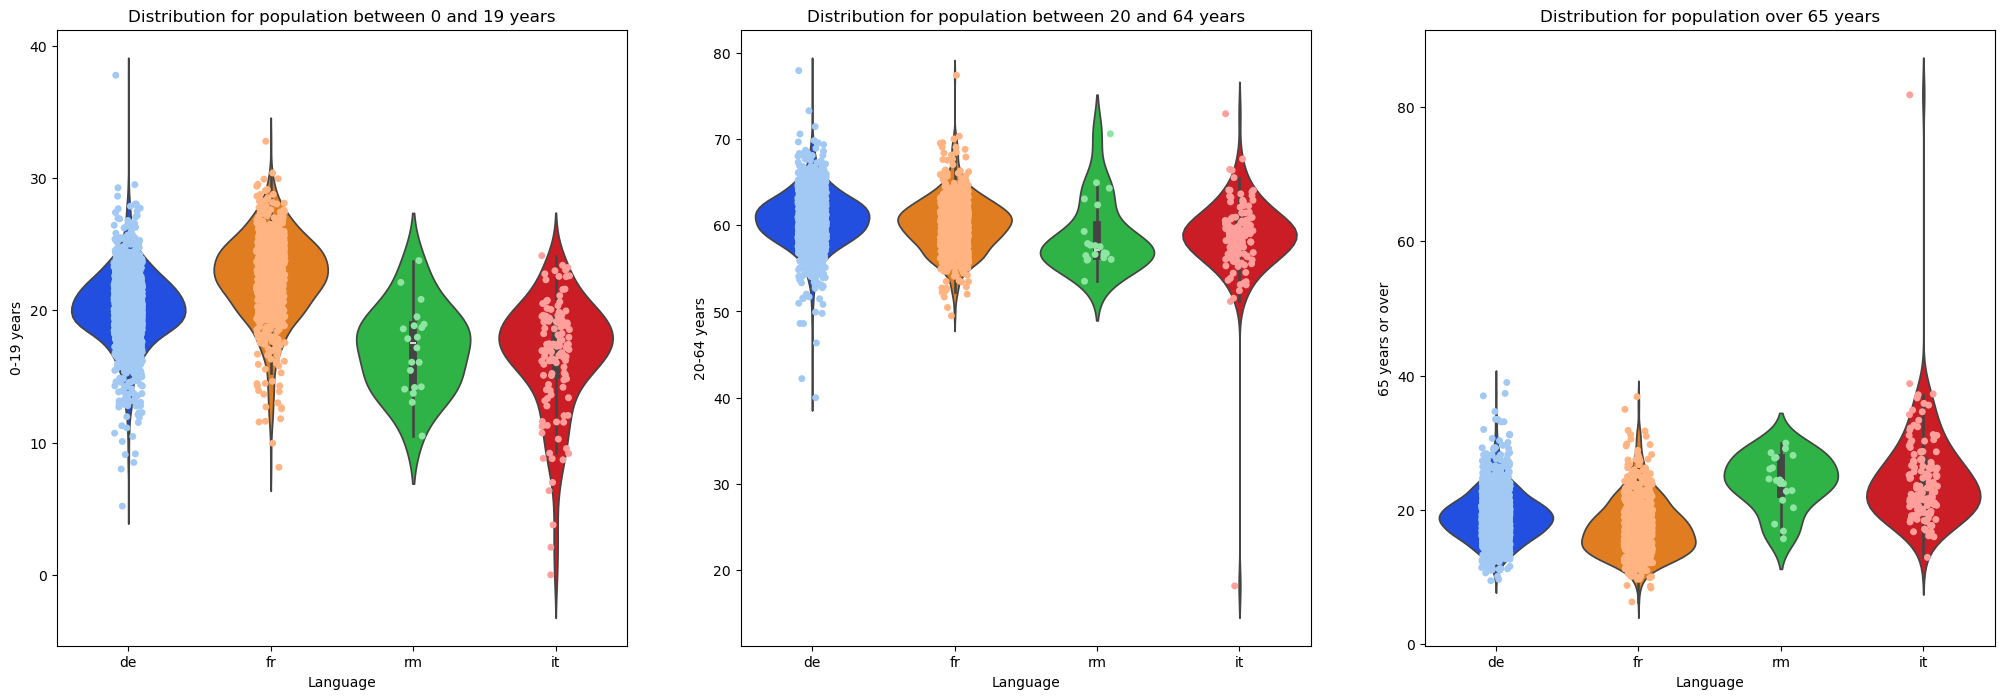

In [342]:
#5
#setting figure and axes (rows and columns)
figure, axes = plt.subplots(nrows=1, ncols=3, figsize= (25,8))


#plotting the axes one by one
sns.violinplot(x = clean_df['Language'], 
                         y = clean_df['0-19 years'], 
                         hue=clean_df['Language'], 
                         palette='bright',
                         ax=axes[0]) #assingin the axes directly from parameter ax

sns.violinplot(x = clean_df['Language'], 
                         y = clean_df['20-64 years'], 
                         hue=clean_df['Language'], 
                         palette='bright',
                         ax=axes[1])
sns.violinplot(x = clean_df['Language'], 
                         y = clean_df['65 years or over'], 
                         hue=clean_df['Language'], 
                         palette='bright',
                         ax=axes[2])

#then setting title for all axes
axes[0].set(title='Distribution for population between 0 and 19 years',) 
axes[1].set(title='Distribution for population between 20 and 64 years')
axes[2].set(title='Distribution for population over 65 years');


#finally adding the stripplot in pastel palette
sns.stripplot(ax=axes[0], data=clean_df, x='Language', y='0-19 years', palette='pastel')
sns.stripplot(ax=axes[1], data=clean_df, x='Language', y='20-64 years', palette='pastel')
sns.stripplot(ax=axes[2], data=clean_df, x='Language', y='65 years or over', palette='pastel');



C:\Users\aleja\AppData\Local\Temp\ipykernel_13628\441868307.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairplot_data['Elevation group'] = pd.cut(pairplot_data['Elevation'], bins=4) #https://www.geeksforgeeks.org/pandas-cut-method-in-python/


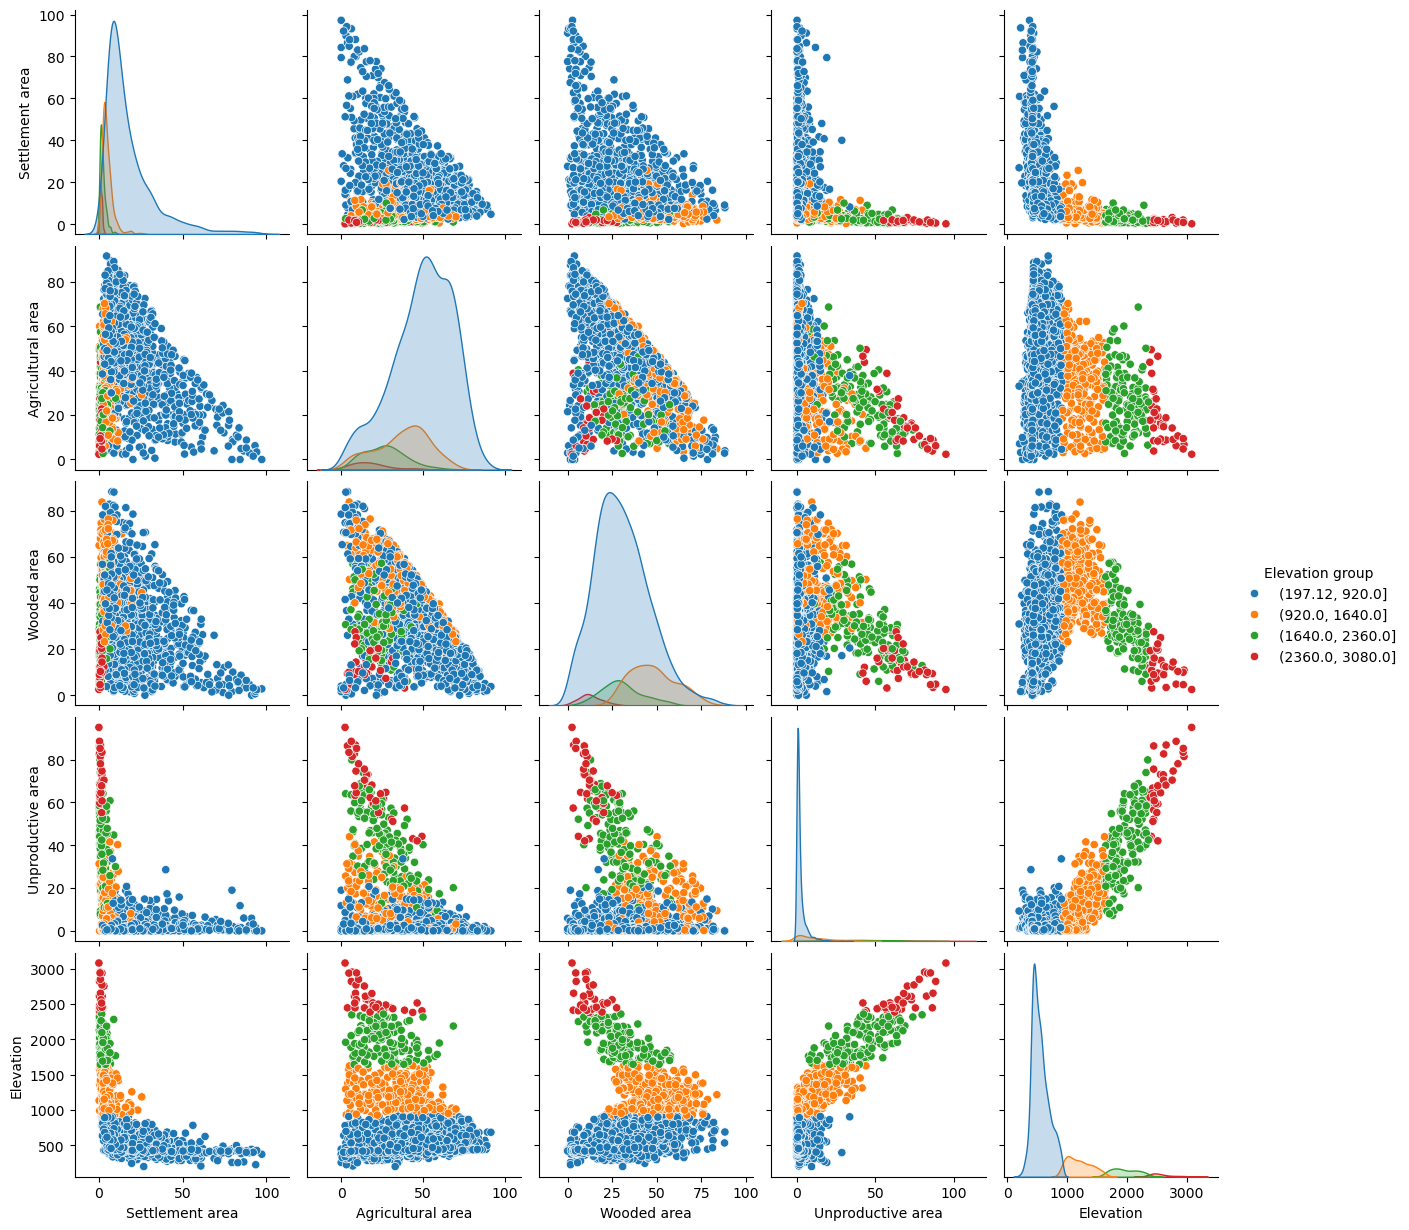

In [343]:
#5
#first we subset the interesting columns for this task:
pairplot_data = clean_df.iloc[:,[10,11,12,13,-1]]
#We add the elevation group colum in order to avoid having too many parameters for the hue= argument. 
pairplot_data['Elevation group'] = pd.cut(pairplot_data['Elevation'], bins=4) #https://www.geeksforgeeks.org/pandas-cut-method-in-python/
#after this, we have 4 categories of elevation that are represented with 4 colors, which make the graphic more readable:
sns.pairplot(pairplot_data, hue='Elevation group');

As pre-announced in the task indications, settlement areas are more prominent in low-elevation communes (blue and orange), indicating that urban areas tend to happen in lower regions.

On the other hand, unproductive areas increase sharply with higher elevation (green and red), especially in communes above 2000 meters. This is reasonable, considering the hard conditions of the Swiss Alps. 

Finally, agricultural and wooden areas tend to cluster at intermediate-elevate communes, because this areas are still accessible and usable but maybe less urbanized.

C:\Users\aleja\AppData\Local\Temp\ipykernel_13628\4267301779.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_data['Elevation group'] = pd.cut(scatter_data['Elevation'], bins=6, labels=['> 680m','Between 680 and 1160 m', 'Between 1160 and 1640 m', 'Between 1640 and 2120 m','Between 2120 and 2600 m', 'Over 2600 m'])


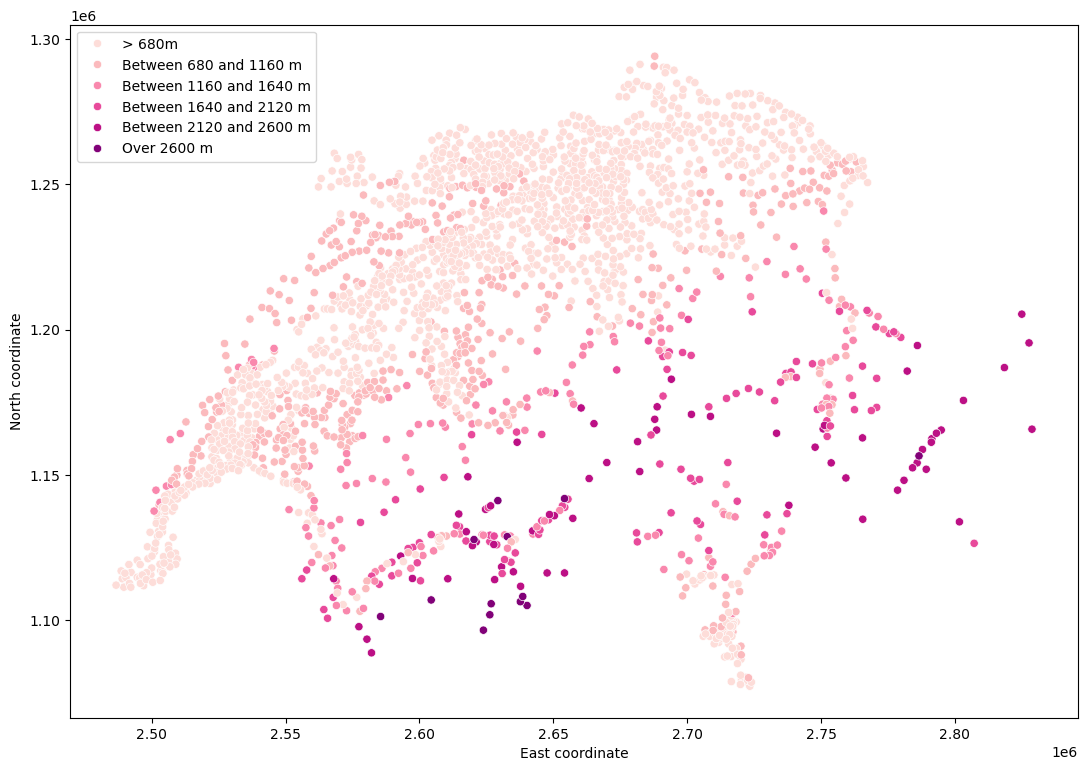

In [344]:
#6
#subsetting the data for the scatterplot (in this case columns elevation, east and north coordinates)
scatter_data = clean_df.iloc[:,[-1,-2,-3]]

#adding a new column to categorize the elevation (otherwise there are too many parameters to assign the hue)
scatter_data['Elevation group'] = pd.cut(scatter_data['Elevation'], bins=6, labels=['> 680m','Between 680 and 1160 m', 'Between 1160 and 1640 m', 'Between 1640 and 2120 m','Between 2120 and 2600 m', 'Over 2600 m'])

#setting the figure
plt.figure(figsize=(13,9))

#creating the scatterplot
sns.scatterplot(x='East coordinate',y='North coordinate',data=scatter_data,hue='Elevation group',palette='RdPu' ,marker='o') #I didn't find the proper palette, so I tried several until I found a similar one in https://r02b.github.io/seaborn_palettes/
plt.legend(loc='upper left')



C:\Users\aleja\AppData\Local\Temp\ipykernel_13628\452338152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_data['Language'] = clean_df['Language']


<Axes: xlabel='East coordinate', ylabel='North coordinate'>

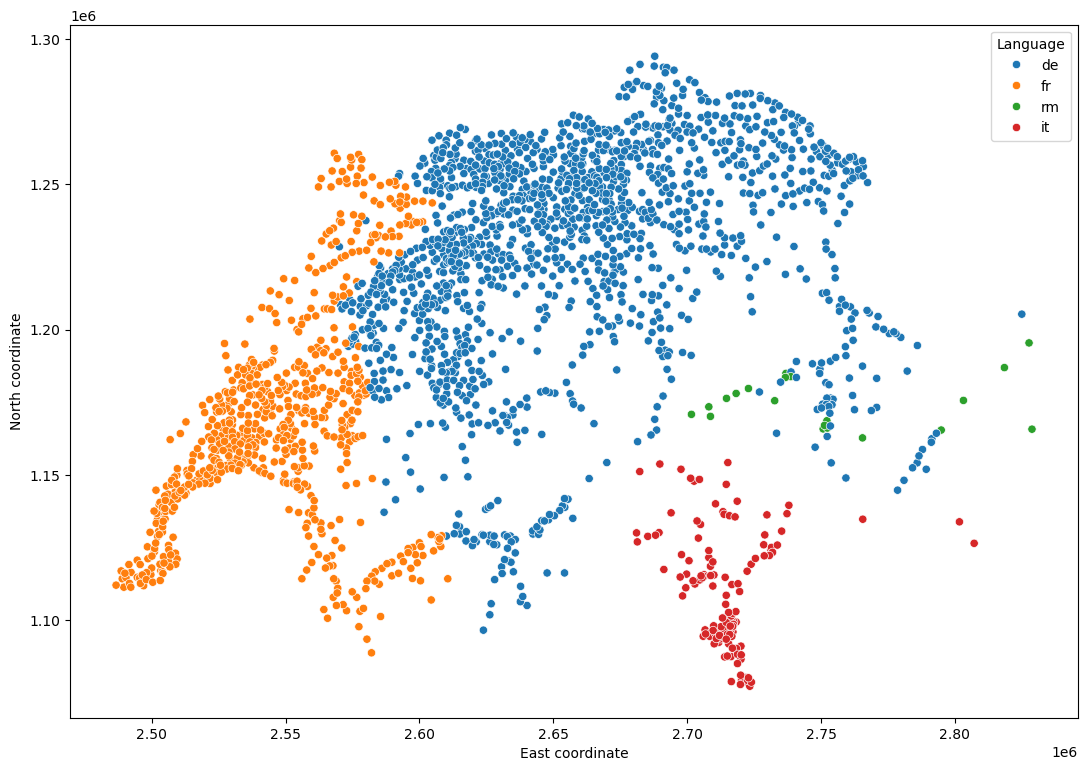

In [345]:
#the second plot is almost identic, we just have to exchange elevation to language. To do that, i just add the column to the scatter_data df 
scatter_data['Language'] = clean_df['Language']
plt.figure(figsize=(13,9))

sns.scatterplot(x='East coordinate',
                y='North coordinate',
                data=scatter_data,
                hue='Language',
                markers='o')

The plot is very clear, as most of the regions are clearly differenced: we find a big french region in the west side of the country (orange), while most of the country is german-speaking and we can see its presence in the center, north, east and even south sections of the map (blue). Then we find a small but well defined italian region (red), and finally few green spots that represent the romansh communes, that are more dispersed in the central-east region of the country (this language is by far the less spoken in the country).  

Text(0.5, 0, 'East Coordinate')

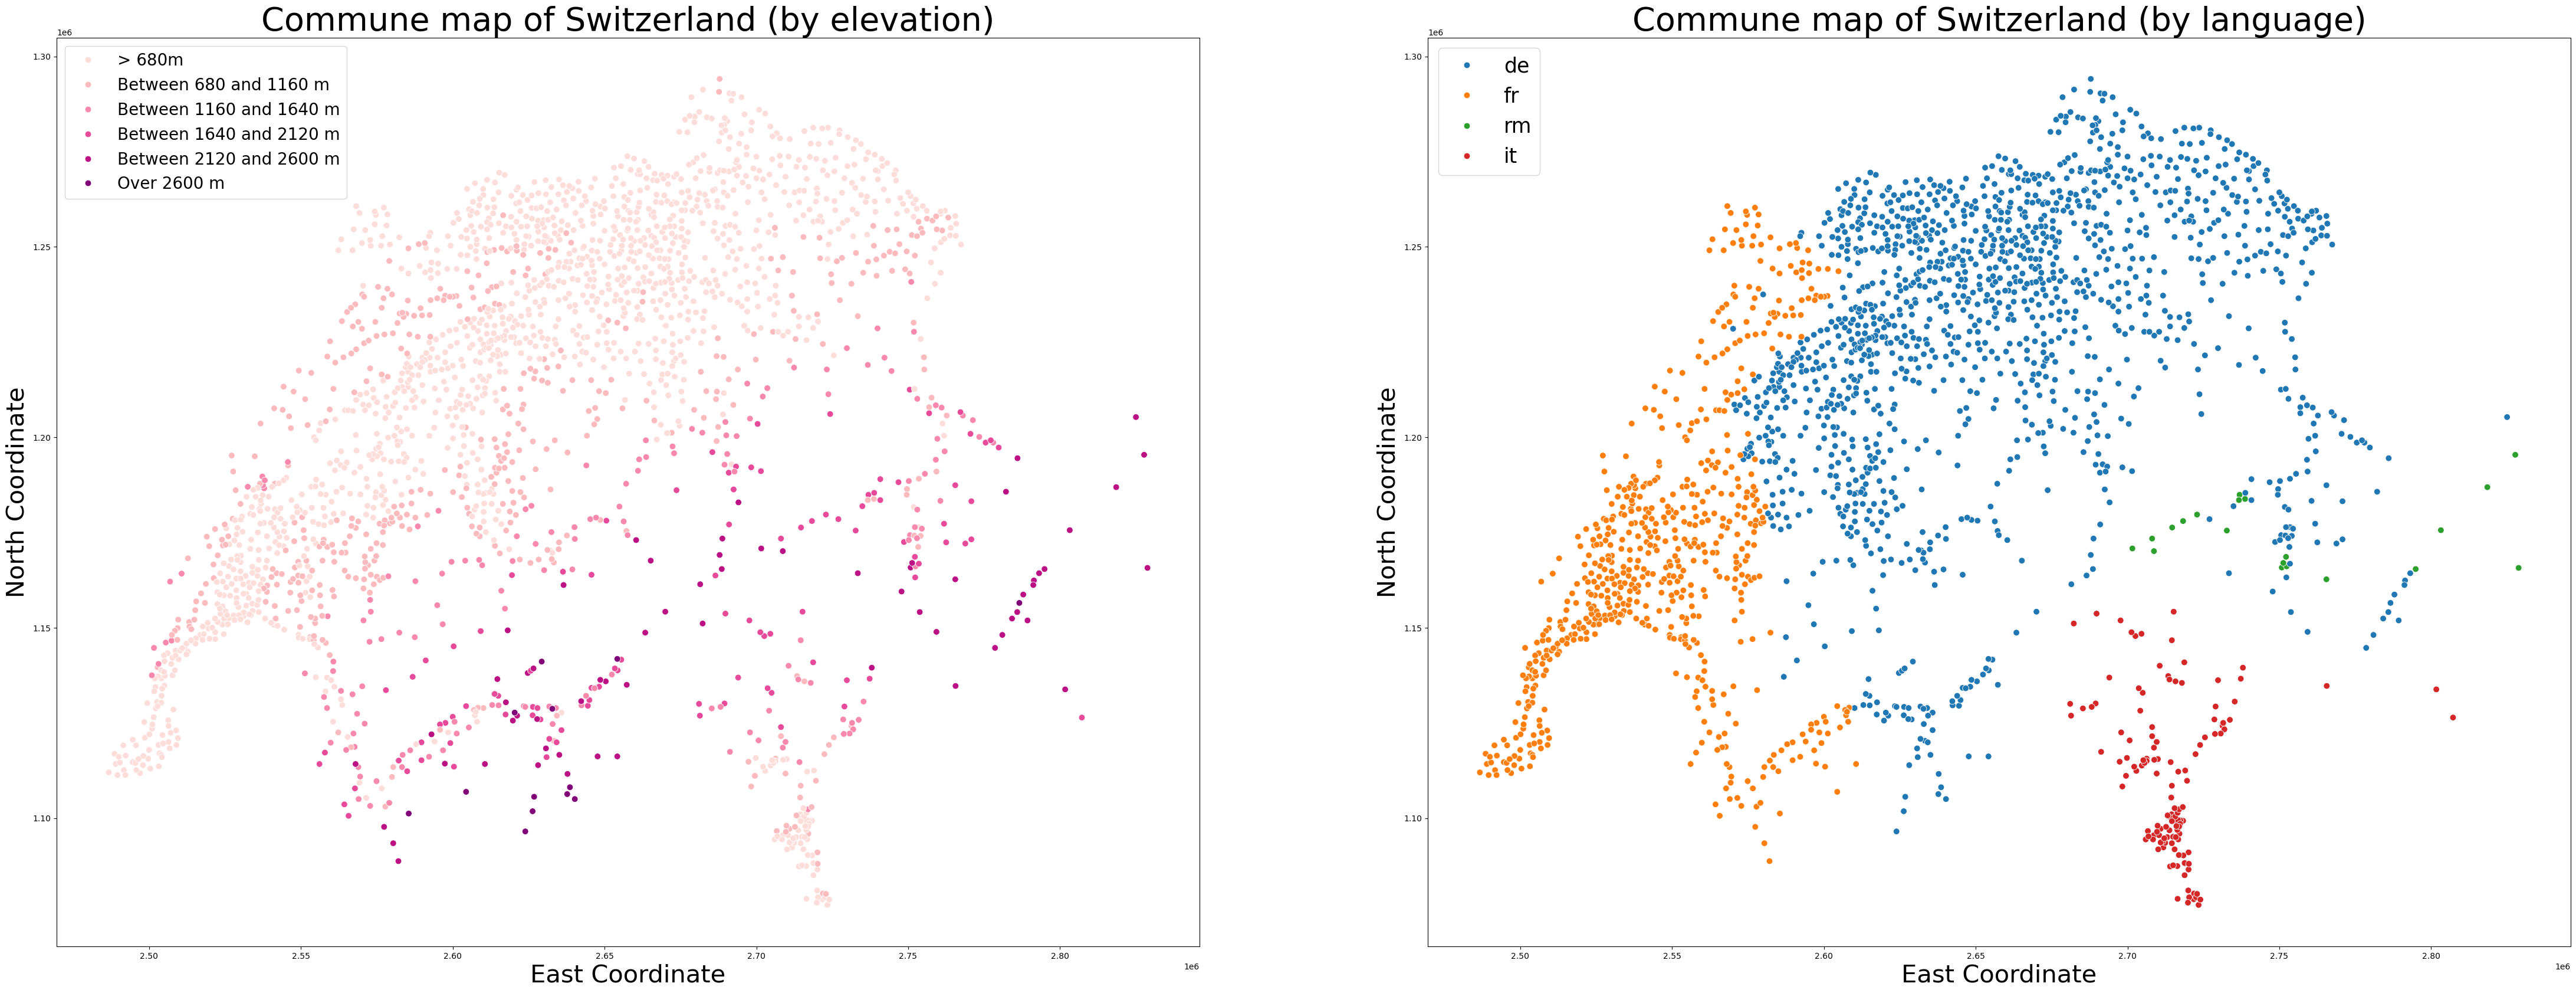

In [ ]:

#8
#now we generate a combined graphic with both scatterplots
#First I set the figire and axes:
fig,axes = plt.subplots(ncols=2,nrows=1,figsize=(55,20))

#now I add the first plot:
sns.scatterplot(x='East coordinate',
                          y='North coordinate',
                          data=scatter_data,
                          hue='Elevation group',
                          palette='RdPu' ,
                          markers='o',
                          s=60,
                          ax=axes[0])
axes[0].legend(loc='upper left', fontsize=20)
axes[0].set_title('Commune map of Switzerland (by elevation)',fontsize=40)
axes[0].set_ylabel('North Coordinate',fontsize=30)
axes[0].set_xlabel('East Coordinate',fontsize=30)


#and then the second:
sns.scatterplot(x='East coordinate',
                          y='North coordinate',
                          data=scatter_data,
                          hue='Language',
                          markers='o',
                          s=60,
                          ax=axes[1])
axes[1].legend(loc='upper left',fontsize=25)
axes[1].set_title('Commune map of Switzerland (by language)',fontsize=40)
axes[1].set_ylabel('North Coordinate',fontsize=30)
axes[1].set_xlabel('East Coordinate',fontsize=30)

## D. Probabilities
The objective of this task is to assess your understanding of the conditional probability, but it could be also considered as a data exploration question.

Compute the probability that a randomly selected commune with elevation over 2000 is from the canton of Valais.

In [346]:
#first we subset the communes over 2000 m
total_high_communes = clean_df[clean_df['Elevation'] >= 2000]

#then from that subset, we subset those communes that belongs to canton VS
valais_high_communes = total_high_communes[total_high_communes['Canton'] == 'VS']


#then we manually make the operation to calculate the condicional probability
probability = valais_high_communes['Commune'].count() / total_high_communes['Commune'].count()
probability



np.float64(0.5104166666666666)

## E. Matrices
The objective of this task is to assess some of the skills you have learned in this course, but later on you will see that it becomes an important preprocessing step before using Machine Learning models.

Define a data frame matrix whose rows correspond to communes and the columns to the cantons. Fill in the matrix with 0/1 values where entry 
(
i
,
j
)
 is a 1 if the commune in row 
i
 is in the canton in column 
j
 and a 0 otherwise.

In [ ]:
#with pd.crosstab() , it directly fills the matrix with the required information
matrix = pd.crosstab(clean_df['Commune'], clean_df['Canton']) #https://www.geeksforgeeks.org/pandas-crosstab-function-in-python/

matrix

Canton,AG,AI,AR,BE,BL,BS,FR,GE,GL,GR,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
Commune,,,,,,,,,,,,,,,,,,,,,
Aadorf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Aarau,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aarberg,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aarburg,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aarwangen,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zwieselberg,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zwingen,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zwischbergen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Appendix 

Almost all the code, analysis, and documentation in this notebook are my own work. When I used methods that were not explained in this course I copied and pasted the source I used near it in order to make it clear (mostly from geeksforgeeks).
This is the final result of several trying and error tentatives.